<a href="https://colab.research.google.com/github/qfx4yk/PyTorch/blob/main/PyTorch_Datasets_%26_DataLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Transforming our incoming images into a PyTorch tensor
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

Above, we specify two transformations for our input:

*   transforms.ToTensor() converts images loaded by Pillow into PyTorch tensors.
*   transforms.Normalize() adjusts the values of the tensor so that their average is zero and their standard deviation is 0.5. Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.

# Loading a Dataset

*  root = filesystem path where the train/test data is stored
*  train = specifies training or test dataset; most datasets will be split into training and test subsets
*  download=True downloads the data from the internet if it’s not available at root
* transform and target_transform specify the feature and label transformations





### CIFAR10 is a dataset of 32x32 color image tiles representing 10 classes of objects:6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck):

In [3]:
# Creating a instance of CIFAR10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 51.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


The code above creates a dataset object in PyTorch. Downloadable datasets (like CIFAR10) are subclasses of torch.utils.data.Dataset. Dataset classes in PyTorch include dowloadable datasets in TorchVision, Torchtext, and TorchAudio, as well as utility dataset classes such as torchvision.datasets.ImageFolder, which will read a folder of labeled images. You can also create your own subclasses of Dataset.


In [4]:
# Once dataset is ready, you can give it to the DataLoader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

A Dataset subclass wraps access to the data, and is specializaed to the type of data it is serving. The DataLoader knows **nothing** about the data, but organizes the input tensors served by the Dataset into batches with the parameters you specify.

In the example above, we asked a DataLoader to give us batches of 4 images from trainset, randomizing their order (shuffle=True), and we told it to spin up two workers to load data from disk.

### Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of 10 classes.

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 366kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.33MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.71MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## The STL-10 dataset is an image recognition dataset for developing unsupervised feature learning, deep learning, self-taught learning algorithms.
10 classes: airplane, bird, car, cat, deer, dog, horse, monkey, ship, truck.
Images are 96x96 pixels, color.
500 training images (10 pre-defined folds), 800 test images per class.
100000 unlabeled images for unsupervised learning. These examples are extracted from a similar but broader distribution of images. For instance, it contains other types of animals (bears, rabbits, etc.) and vehicles (trains, buses, etc.) in addition to the ones in the labeled set.
Images were acquired from labeled examples on ImageNet.

**Source: https://cs.stanford.edu/~acoates/stl10/**

In [6]:
stl_data_train = datasets.STL10(
    root="data",
    split = "train",
    download=True,
    transform=ToTensor()
)

stl_data_test = datasets.STL10(
    root="data",
    split = "test",
    download=True,
    transform=ToTensor()
)

100%|██████████| 2.64G/2.64G [03:50<00:00, 11.5MB/s]


Extracting data/stl10_binary.tar.gz to data
Files already downloaded and verified


# Iterating and Visualizing the Dataset

## CIFAR10

  dog birdtruckplane


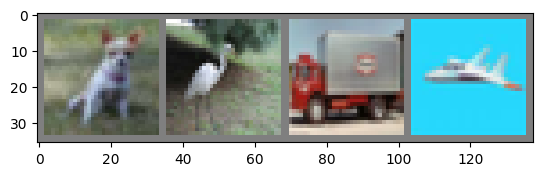

In [23]:
# Visualize bathches of data
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

## Fashion-MNIST

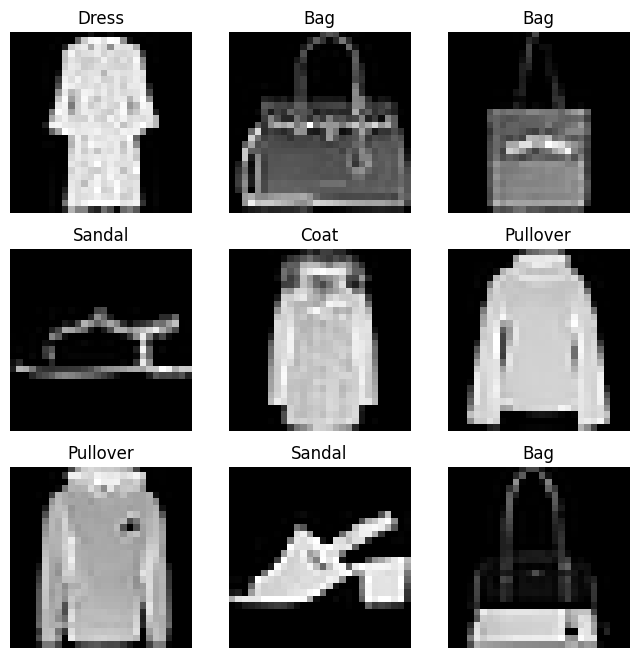

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## STL-10

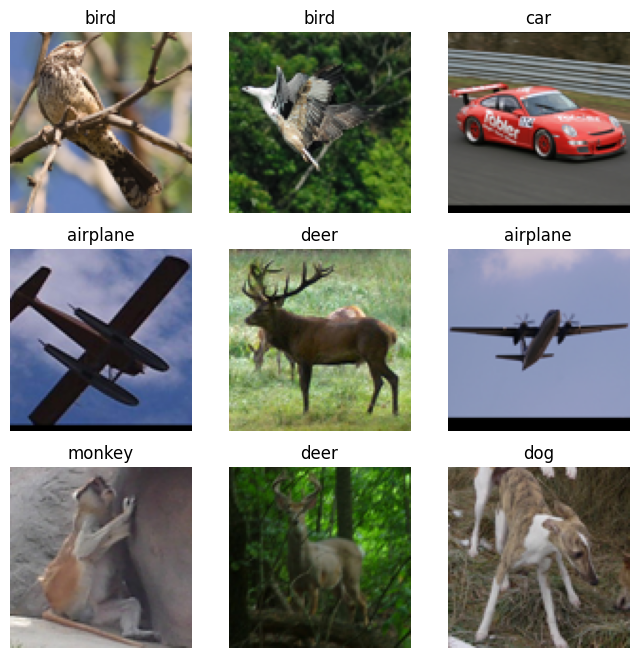

In [24]:
labels_map = {
    0: "airplane",
    1: "bird",
    2: "car",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "horse",
    7: "monkey",
    8: "ship",
    9: "truck",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(stl_data_train), size=(1,)).item()
    img, label = stl_data_train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.permute(1,2,0))
plt.show()

# Creating a Custom Dataset for your files

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

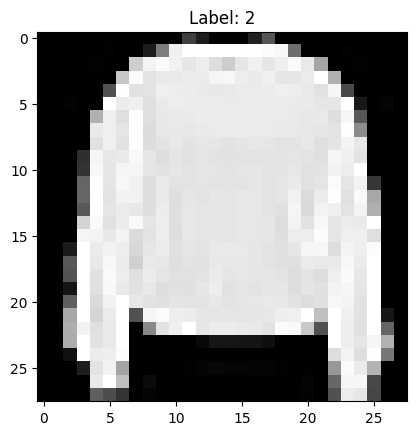

In [26]:
class CustomFashionDataset(Dataset):
    def __init__(self, root_dir, transform=None, target_transform=None, train=True):
        # Load FashionMNIST dataset using datasets.FashionMNIST
        self.fashion_mnist = datasets.FashionMNIST(
            root=root_dir,
            train=train,  # Set to False for test data
            download=True,
            transform=transform
        )
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        # Length is the size of the FashionMNIST dataset
        return len(self.fashion_mnist)

    def __getitem__(self, idx):
        # Get image and label from FashionMNIST dataset
        image, label = self.fashion_mnist[idx]

        # Convert PIL Image to PyTorch tensor if transform is not already applied
        if not isinstance(image, torch.Tensor):
            image = ToTensor()(image) # Apply ToTensor transform

        if self.target_transform:
            label = self.target_transform(label)
        return image, label

# Example usage:
fashion = CustomFashionDataset(root_dir='data', train=True) # For the training set.

# Assuming you want to view an image and label
image, label = fashion[7]
plt.imshow(image.squeeze(), cmap="gray") # Display the image
plt.title(f"Label: {label}") # Display the label
plt.show()

**________init_____**

The __init__ function is run once when instantiating the Dataset object. We initialize the directory containing the images, the annotations file, and both transforms.

In [27]:
# The labels.csv file looks like:
# tshirt1.jpg, 0
# tshirt2.jpg, 0
# ankleboot999.jpg, 9

In [28]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

**_______len___**

The __len__ function returns the number of samples in our dataset.

In [29]:
def __len__(self):
    return len(self.img_labels)

**_________getitem_____**

The __getitem__ function loads and returns a sample from the dataset at the given index idx. Based on the index, it identifies the image’s location on disk, converts that to a tensor using read_image, retrieves the corresponding label from the csv data in self.img_labels, calls the transform functions on them (if applicable), and returns the tensor image and corresponding label in a tuple.

In [30]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

# Preparing your data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

In [31]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


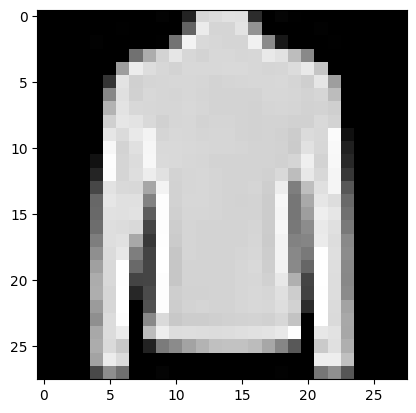

Label: 2


In [34]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")